In [1]:
import tensorflow 
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D, Conv2D, UpSampling2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array

In [2]:
directory = 'C:/Users/ASUS/Desktop/OpenCV Tutorial/OpenCV Projects/Fake Faces using GAN/img_align_celeba/img_align_celeba'
# Get all images from dir
dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(directory=directory, color_mode='rgb',
                                                   batch_size=128, image_size=(32,32), label_mode=None,
                                                   shuffle=True, seed=42)

# Normalize the data

dataset=dataset.map(lambda x: x /255.00)
# Example: Iterate over the dataset
for batch in tqdm(dataset):
    # Use batch for training or processing
   pass


Found 196980 files.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1539/1539 [01:43<00:00, 14.86it/s]


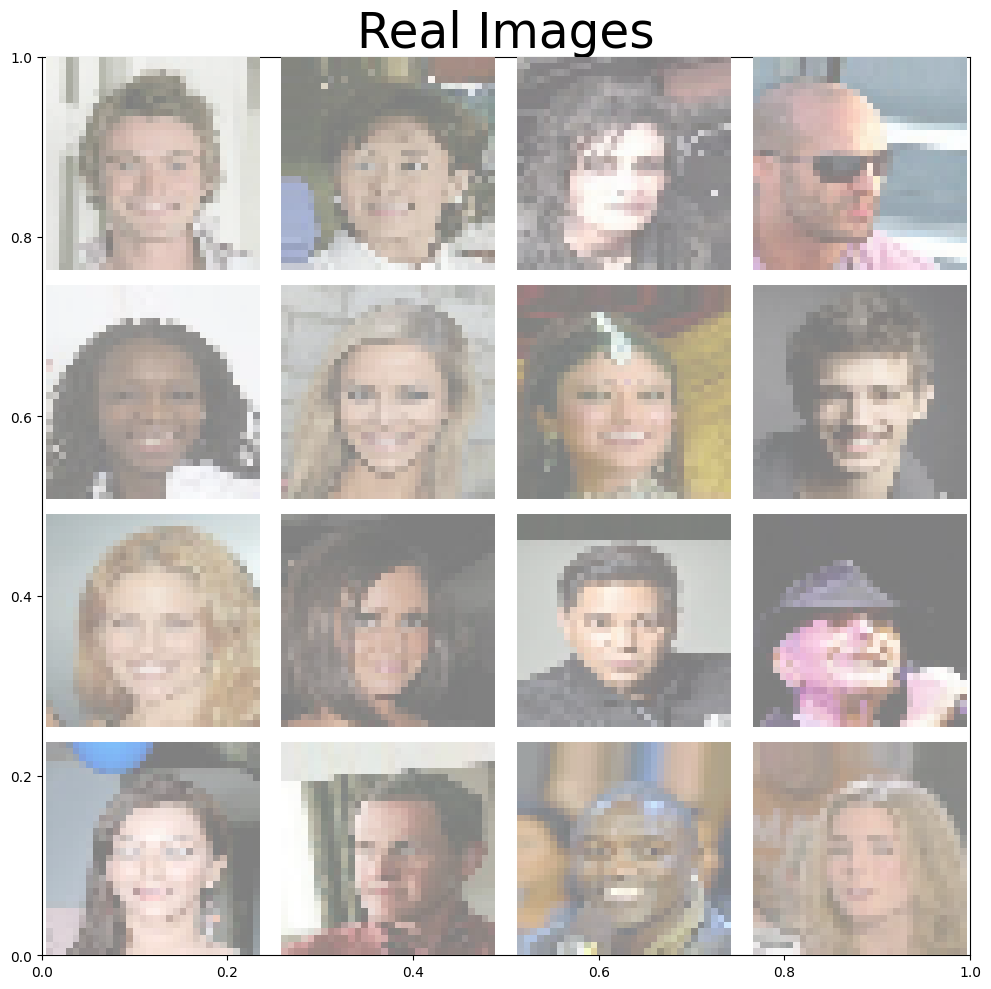

In [3]:
def plot_images(dataset, sqr=5):
    plt.figure(figsize=(10, 10))
    plt.title("Real Images", fontsize=35)
    
    # Fetch the first `sqr * sqr` images from the dataset
    count = 0
    for batch in dataset:
        for img in batch:
            if count >= sqr * sqr:
                break
            plt.subplot(sqr, sqr, count + 1)
            plt.imshow((img.numpy() * 0.5 + 0.5))  # Rescale [-1, 1] to [0, 1] for display
            plt.axis('off')
            count += 1
        if count >= sqr * sqr:
            break
    plt.tight_layout()
    plt.show()

# Plot the images using the dataset
plot_images(dataset, sqr=4)

In [4]:
def discriminator_model():
    disc_input = Input(shape=(32,32,3), name='discriminator_network')
    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)
    
    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)
    
    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)
    
    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)
    
    x=Flatten()(x)
    x=Dense(1)(x)
    
    output = Activation('sigmoid')(x)
    
    disc=Model(inputs = disc_input, outputs=output)
    
    return disc
    
    noise = Input(shape=(100,))
    fake_image = model(noise)
    
    return Model(inputs=noise, outputs=fake_image)



In [5]:
disc_model = discriminator_model()
disc_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ discriminator_network (InputLayer)   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,281 (1.13 MB)

 Trainable params: 297,281 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def generator_model():
    gen_input = Input(shape=(100,), name='generator_network')
    
    x = Dense(8*8*3)(gen_input)
    x = Reshape(target_shape=(8,8,3))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(filters=512, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(filters=256, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
        
    x = Conv2DTranspose(filters=64, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(filters=3, kernel_size=3, strides=(1,1), padding='same')(x)
    fake_images_gen = LeakyReLU()(x)
    
    model_gen=Model(inputs = gen_input, outputs=fake_images_gen)
    
    return model_gen

In [7]:
gen_model = generator_model()
gen_model.summary(0)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ generator_network (InputLayer)       │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          19,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 3)             │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 512)           │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             2

 Total params: 1,736,143 (6.62 MB)

 Trainable params: 1,733,961 (6.61 MB)

 Non-trainable params: 2,182 (8.52 KB)

In [8]:
disc_model = discriminator_model()
gen_model = generator_model()
# Image Classification CNN
# Compile the model that trains disc.
disc_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
# Compile the model that trains generator
z_dim = 100
disc_model.trainable = False
model_input = Input(shape=(z_dim,), name='model_input')
model_output = disc_model(gen_model(model_input))

model = Model(model_input, model_output)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ model_input (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_3 (Functional)            │ (None, 32, 32, 3)           │       1,736,143 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_2 (Functional)            │ (None, 1)                   │         297,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,033,424 (7.76 MB)

 Trainable params: 1,733,961 (6.61 MB)

 Non-trainable params: 299,463 (1.14 MB)

In [11]:
def train_discriminator(batch, batch_size):
    valid = np.ones((batch_size, 1)) 
    fake = np.zeros((batch_size, 1)) 
    
    disc_model.train_on_batch(batch, valid)
    
    noise = np.random.normal(0,1, (batch_size, z_dim))
    gen_image = gen_model.predict(noise)
    disc_model.train_on_batch(gen_image, fake)
    
def train_generator(batch_size):
    valid = np.ones((batch_size, 1)) 
    noise = np.random.normal(0,1, (batch_size, z_dim))
    model.train_on_batch(noise, valid)

In [12]:
from keras.preprocessing.image import array_to_img, save_img
def save_image(fake_image, path):
    image = array_to_img(fake_image.numpy())
    save_img(path, image)
    return image
def generate_and_save_image(path):
    noise = np.random.normal(0,1, (1, z_dim))
    fake_images = gen_model(noise)
    image = save_image(fake_images[0], path)
    plt.imshow(image)
    plt.show()

No of Epochs-> 0


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
Batch Images-> 0


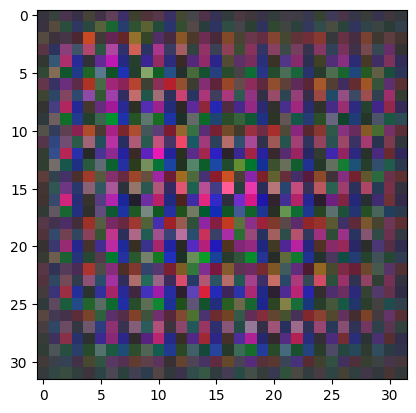

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

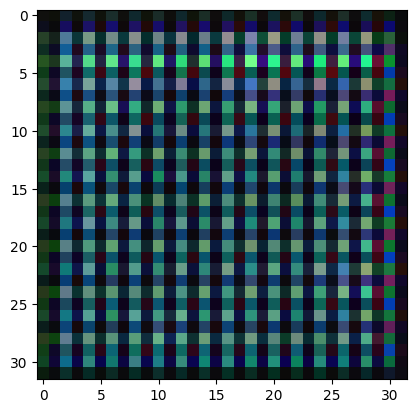

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

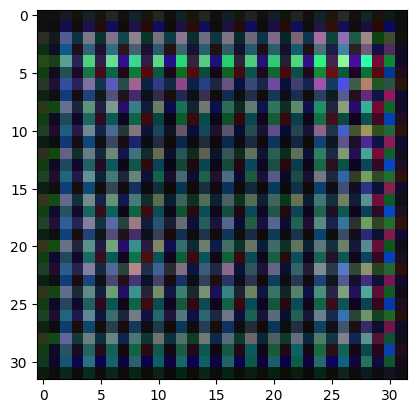

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


In [ ]:
for epochs in range(10):
    print(f'No of Epochs-> {epochs}')
    for i,batch in enumerate(dataset):
        train_discriminator(batch, batch.shape[0])
        train_generator(batch.shape[0])
        if i%100==0:
            print(f'Batch Images-> {i}')
            PATH = 'generate_face'
            generate_and_save_image(path = f'{PATH}/epochs_{epochs}batch_{i}.jpg')